# CHAPTER 1 신경망 복습

## 1-1 수학과 파이썬 복습

### 1-1-1 벡터와 행렬

### 1-1-2 행렬의 원소별 연산

### 1-1-3 브로드캐스트

### 1-1-4 벡터의 내적과 행렬의 곱

### 1-1-5 행렬 형상 확인

## 1-2 신경망의 추론

### 1-2-1 신경망 추론 전체 그림

In [ ]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.random.randn(10 , 2)
W1 = np.random.randn(2,4)
b1 = np.random.randn(4)
W2 = np.random.randn(4,3)
b2 = np.random.randn(3)

h = np.matmul(x , W1) + b1
a = sigmoid(h)
s = np.matmul(a , W2) + b2

### 1-2-2 계층으로 클래스화 및 순전파 구현

In [ ]:
import numpy as np

class Sigmoid:
    def __init__(self):
        self.params = []

    def forward(self , x):
        return 1 / (1 + np.exp(-x))

In [ ]:
class Affine:
    def __init__(self , W , b):
        self.params = [W,b]

    def forward(self , x):
        W, b = self.params
        out = np.matmul(x , W) + b
        return out

In [ ]:
class TwoLayerNet:
    def __init__(self , input_size , hidden_size , output_size):
        I ,H , O = input_size , hidden_size , output_size

        # 가중치와 편향 초기화
        W1 = np.random.randn(I ,H)
        b1 = np.random.randn(H)
        W2 = np.random.randn(H ,O)
        b2 = np.random.randn(O)

        # 계층 생성
        self.layers = [
                       Affine(W1 , b1).
                       Sigmoid(),
                       Affine(W2 ,b2)
        ]

        # 모든 가중치를 리스트에 모은다
        self.params = []
        for layer in self.layers:
            self.params += layer.params

    def predict(self , x):
        for layer in self.layers:
            x = layer.forward(x)
        return x

## 1-3 신경망의 학습

### 1-3-1 손실 학습

### 1-3-2 미분과 기울기

### 1-3-3 연쇄 법칙

### 1-3-4 계산 그래프

In [ ]:
class MatMul:
    def __init__(self , W):
        self.params = [W]
        self.grads = [np.zeos_like(W)]
        self.x = None

    def forward(self , x):
        W, = self.params
        out = np.matmul(x , W)
        self.x = x
        return out
    
    def backward(self, dout):
        W, = self.params
        dx = np.matmul(dout , W.T)
        dW = np.matmul(self.x.T , dout)
        self.gras[0][...] = dW
        return dx

### 1-3-5 기울기 도출과 역전파 구현

In [ ]:
class Sigmoid:
    def __init__(self):
        self.params, self.grads = [] , []
        self.out = None

    def forward(self , x):
        out = 1 / (1 + np.exp(-x))
        self.out = out
        return out

    def backward(self , dout):
        dx = dout * (1.0 - self.out) * self.out
        return dx

In [ ]:
class Affine:
    def __init__(self , W ,b):
        self.params = [W, b]
        self.grads = [np.zeros_like(W) , np.zeros_like(b)]
        self.x = None

    def forward(self , x):
        W ,b = self.params
        out = np.matmul(x , W) + b
        self.x = x
        return out

    def backward(self ,dout):
        W , b = self.params
        dx = np.matmul(dout , W.T)
        dW = np.matmul(self.x.T  ,dout)
        db = np.sum(dout , axis = 0)

        self.grads[0][...] = dW
        self.grads[1][...] = db
        return dx

### 1-3-6 가중치 생신

In [ ]:
class SGD:
    def __init__(self , lr=0.01):
        self.lr = lr

    def update(self , params, grads):
        for i in range(len(params)):
            params[i] -= self.lr * grads[i]

## 1-4 신경망으로 문제를 풀다

### 1-4-1 스파이럴 데이터셋

In [1]:
import sys
sys.path.append('/content/drive/MyDrive/AI/독학/밑시딥 2')
from dataset import spiral
import matplotlib.pyplot as plt

x, t = spiral.load_data()
print('x' , x.shape)
print('t' , t.shape)

x (300, 2)
t (300, 3)


### 1-4-2 신경망 구현

In [3]:
import numpy as np
from common.layers import Affine , Sigmoid , SoftmaxWithLoss

class TwoLayerNet:
    def __init__(self , input_size  , hidden_size , output_size):
        I ,H , O = input_size , hidden_size , output_size

        # 가중치와 편향 초기화
        W1 = 0.01 * np.random.randn(I , H)
        b1 = np.zeros(H)
        W2 = 0.01 * np.random.randn(H , O)
        b2 = np.zeros(O)

        # 계층 생성
        self.layers = [
                       Affine(W1 , b1),
                       Sigmoid(),
                       Affine(W2 , b2)
        ]
        self.loss_layer = SoftmaxWithLoss()

        self.params , self.grads = [] , []
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads
        

    def predict(self ,x):
        for layer in self.layers:
            x = layer.forward(x)
        return x

    def forward(self , x , t):
        score = self.predict(x)
        loss = self.loss_layer.forward(score , t)
        return loss

    def backward(self ,dout=1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout

### 1-4-3 학습용 코드

In [3]:
import numpy as np
from common.optimizer import SGD
from dataset import spiral
import matplotlib.pyplot as plt

# 1 하이퍼 파라미터 설정
max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

# 2 데이터 읽기, 모델과 옵티마이저 생성
x , t = spiral.load_data()
model = TwoLayerNet(input_size = 2 , hidden_size = hidden_size , output_size = 3)
optimizer = SGD(lr = learning_rate)

# 학습에 사용하는 변수
data_size =len(x)
max_iters = data_size // batch_size
total_loss = 0
loss_count = 0
loss_list = []

for epoch in range(max_epoch):
    # 3 데이터 뒤섞기
    idx = np.random.permutation(data_size)
    x = x[idx]
    t = t[idx]

    for iters in range(max_iters):
        batch_x = x[iters*batch_size  : (iters+1) * batch_size]
        batch_t = t[iters*batch_size  : (iters+1) * batch_size]

        # 4 기울기를 구해 매개변수 갱신
        loss = model.forward(batch_x , batch_t)
        model.backward()
        optimizer.update(model.params , model.grads)

        total_loss += loss
        loss_count += 1

        # 5 정기적으로 학습 경과 출력
        if (iters + 1) % 20 == 0:
            avg_loss = total_loss / loss_count
            print('| 에폭 %d | 반복 %d / %d | 손실 %.2f'
            % (epoch + 1 , iters + 1 , max_iters , avg_loss))
            loss_list.append(avg_loss)
            total_loss ,loss_count = 0, 0

### 1-4-4 Trainer 클래스

| 에폭 1 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 2 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 3 |  반복 1 / 10 | 시간 0[s] | 손실 1.13
| 에폭 4 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 5 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 6 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 7 |  반복 1 / 10 | 시간 0[s] | 손실 1.14
| 에폭 8 |  반복 1 / 10 | 시간 0[s] | 손실 1.16
| 에폭 9 |  반복 1 / 10 | 시간 0[s] | 손실 1.11
| 에폭 10 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 11 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 12 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 13 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 14 |  반복 1 / 10 | 시간 0[s] | 손실 1.09
| 에폭 15 |  반복 1 / 10 | 시간 0[s] | 손실 1.08
| 에폭 16 |  반복 1 / 10 | 시간 0[s] | 손실 1.04
| 에폭 17 |  반복 1 / 10 | 시간 0[s] | 손실 1.03
| 에폭 18 |  반복 1 / 10 | 시간 0[s] | 손실 0.94
| 에폭 19 |  반복 1 / 10 | 시간 0[s] | 손실 0.92
| 에폭 20 |  반복 1 / 10 | 시간 0[s] | 손실 0.92
| 에폭 21 |  반복 1 / 10 | 시간 0[s] | 손실 0.87
| 에폭 22 |  반복 1 / 10 | 시간 0[s] | 손실 0.85
| 에폭 23 |  반복 1 / 10 | 시간 0[s] | 손실 0.80
| 에폭 24 |  반복 1 / 10 | 시간 0[s] | 손실 0.79
| 에폭 25 |  반복 1 / 10 | 시간

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_te

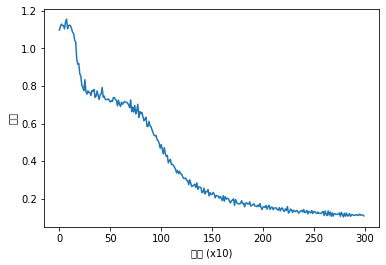

In [4]:
import numpy as np
import sys
sys.path.append('/content/drive/MyDrive/AI/독학/밑시딥 2')
from common.optimizer import SGD
from dataset import spiral
from common.trainer import Trainer
import matplotlib.pyplot as plt


# 1 하이퍼 파라미터 설정
max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

# 2 데이터 읽기, 모델과 옵티마이저 생성
x , t = spiral.load_data()
model = TwoLayerNet(input_size = 2 , hidden_size = hidden_size , output_size = 3)
optimizer = SGD(lr = learning_rate)

trainer = Trainer(model , optimizer)
trainer.fit(x , t , max_epoch , batch_size , eval_interval = 10)
trainer.plot()

## 1-5 계산 고속화

### 1-5-1 비트 정밀도

### 1-5-2 GPU(쿠파이)

## 1-6 wjdfl